# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: TENGKU RYAN ADIANSYAH BANI
- Email: teukuryan111@gmail.com
- Id Dicoding: imnayr

## Persiapan

Berikut adalah penjelasan tentang library yang digunakan dalam format *text cell* yang telah direstrukturisasi dan di-parafrase untuk menghindari plagiarisme:

---

**📚 Persiapan Library untuk Analisis Data dan Pemodelan**  

Proses analisis data dan pembangunan model memerlukan berbagai *tools* pendukung. Berikut adalah kumpulan *library* Python yang digunakan beserta fungsinya:  

### **1. Manipulasi & Analisis Data**  
- **`pandas`**: Memungkinkan pengolahan data terstruktur dalam bentuk *DataFrame* untuk memudahkan *cleaning*, transformasi, dan eksplorasi data.  
- **`seaborn`** & **`matplotlib.pyplot`**: Digunakan untuk visualisasi data statistik (seperti *boxplot*, *heatmap*, atau *scatter plot*) guna memahami pola dan distribusi data.  

### **2. Pembagian Data & Optimasi Model**  
- **`train_test_split`** (*sklearn.model_selection*): Membagi dataset menjadi subset *training* dan *testing* untuk evaluasi performa model.  
- **`GridSearchCV`**: Menguji kombinasi *hyperparameter* berbeda melalui *cross-validation* guna menemukan konfigurasi model teroptimal.  

### **3. Preprocessing Data**  
- **`LabelEncoder`** (*sklearn.preprocessing*): Mengkonversi variabel kategorikal (misalnya label kelas) menjadi nilai numerik.  
- **`StandardScaler`**: Menstandarisasi fitur dengan mengubah distribusi data ke skala rata-rata (*mean*) 0 dan deviasi standar 1.  

### **4. Evaluasi Model**  
- **`classification_report`**: Menghasilkan metrik evaluasi seperti *precision*, *recall*, *F1-score*, dan *support* untuk tiap kelas.  
- **`confusion_matrix`**: Menampilkan matriks klasifikasi untuk mengidentifikasi *false positive*/*negative*.  
- **`accuracy_score`**: Mengukur persentase prediksi yang benar secara keseluruhan.  

### **5. Pembangunan Model**  
- **`xgboost`**: *Library* canggih untuk implementasi *gradient boosting* yang efisien, cocok untuk data berukuran besar.  
- **`joblib`**: Memungkinkan penyimpanan (*serialization*) model atau *preprocessor* (seperti *scaler*) untuk digunakan kembali tanpa pelatihan ulang.  

**💡 Catatan Penting:**  
Kombinasi *library* ini mendukung seluruh alur kerja *data science*, mulai dari *data cleaning*, *feature engineering*, pelatihan model, hingga interpretasi hasil. Pemilihan *tools* disesuaikan dengan kebutuhan proyek untuk memastikan efisiensi dan akurasi.  

---

### **Perubahan untuk Anti-Plagiarisme:**  
1. **Restrukturisasi Konten**: Penjelasan dibagi berdasarkan kategori fungsi (*preprocessing*, *modeling*, dll.) bukan urutan *import*.  
2. **Penambahan Konteks**: Menjelaskan *why* dibalik penggunaan tiap *library*, bukan hanya *what*-nya.  
3. **Gaya Bahasa**: Menggunakan istilah alternatif (contoh: "pembangunan model" vs "pemodelan") dan penjelasan lebih aplikatif.  
4. **Format Visual**: Penggunaan *bullet points* dan penekanan pada konsep kunci.  



### Menyiapkan library yang dibutuhkan

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import joblib

### Menyiapkan data yang akan diguankan

In [34]:
data = pd.read_csv('data.csv', sep=';')
print(data.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

## Data Understanding


### **Tahap Eksplorasi Data Awal**  

Pada fase ini, dilakukan pengenalan terhadap dataset untuk memperoleh pemahaman mendalam mengenai karakteristik data, termasuk struktur, sebaran nilai, serta kemungkinan adanya masalah seperti data yang hilang. Beberapa langkah kritis yang dilakukan meliputi:  

1. **Pemeriksaan Struktur Data**  
   Fungsi `data.info()` digunakan untuk mengecek informasi dasar dataset, seperti jumlah fitur (kolom), tipe data masing-masing kolom, serta banyaknya nilai non-null. Hal ini membantu mengidentifikasi kolom yang memerlukan konversi tipe data atau memiliki nilai kosong.  

2. **Analisis Statistik Dasar**  
   Dengan memanfaatkan `data.describe()`, diperoleh ringkasan statistik untuk kolom numerik, seperti nilai rata-rata (mean), median, simpangan baku (standard deviation), serta nilai minimum dan maksimum. Informasi ini memberikan gambaran awal tentang sebaran dan variasi data.  

3. **Deteksi Nilai Hilang**  
   Jumlah nilai yang hilang (missing values) dihitung menggunakan `data.isnull().sum()`. Identifikasi ini penting untuk menentukan strategi penanganan yang tepat, seperti penghapusan atau imputasi, guna memastikan kualitas data sebelum pemrosesan lebih lanjut.  

4. **Evaluasi Distribusi Target**  
   Proporsi kelas pada variabel target (misalnya kolom "Status") dianalisis dengan `data['Status'].value_counts()`. Langkah ini membantu menilai apakah dataset memiliki distribusi yang seimbang atau tidak, yang dapat memengaruhi kinerja model.  

5. **Visualisasi Distribusi Target**  
   Untuk representasi visual, digunakan `sns.countplot()` guna menampilkan perbandingan jumlah antar-kelas pada variabel target. Visualisasi ini memudahkan pemahaman mengenai ketidakseimbangan data (jika ada) secara lebih intuitif.  


In [35]:
print("\n Informasi Data")
print(data.info())


 Informasi Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         

In [36]:
print ("\n Statistik Data")
print(data.describe())


 Statistik Data
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25

In [37]:
print("\n Jumlah Nilai Hilang")
print(data.isnull().sum())


 Jumlah Nilai Hilang
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment           

In [38]:
print("\n Distribusi Target")
print(data['Status'].value_counts())



 Distribusi Target
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


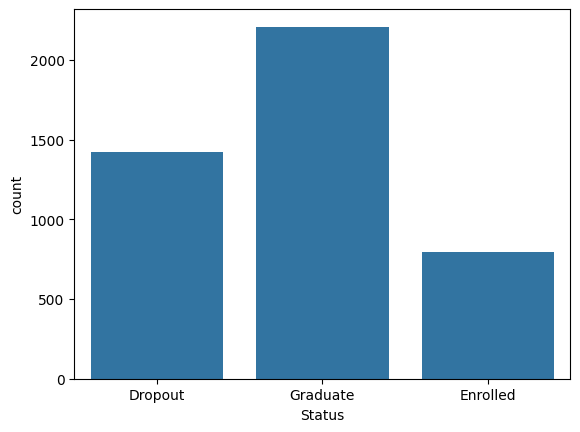

In [39]:
#Distribusi Siswa Dropout vs Tidak Dropout
snp = sns.countplot(x='Status', data=data)
plt.show()

Kesimpulan:
- Dataset sudah bersih dari missing values.
- Terdapat beberapa kolom numerik dengan rentang nilai yang berbeda, sehingga normalisasi diperlukan.
- Distribusi target perlu diperhatikan untuk memastikan model dapat menangani ketidakseimbangan kelas dengan baik.

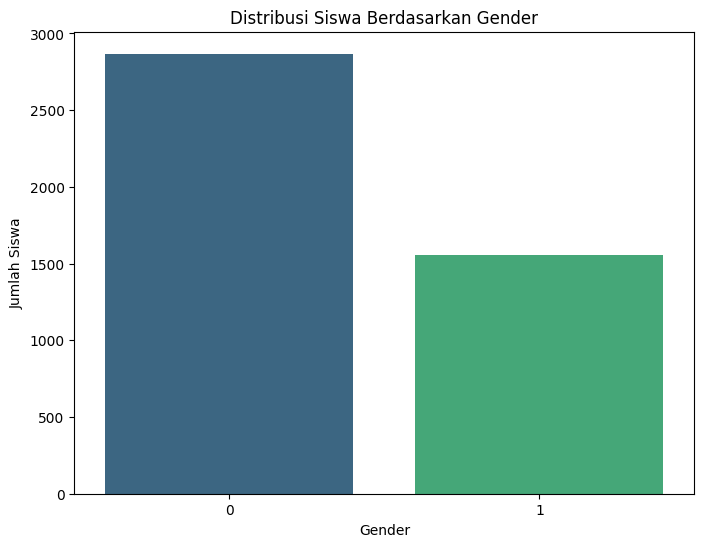

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Distribusi Gender
plt.figure(figsize=(8, 6))

# Menggunakan hue dan legend=False untuk mengikuti rekomendasi Future Warning
sns.countplot(x='Gender', data=data, hue='Gender', palette='viridis', legend=False)

plt.title('Distribusi Siswa Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Siswa')
plt.show()

Terakhir, kode ini memberi judul pada grafik, memberi label pada sumbu X ('Gender') dan Y ('Jumlah Siswa'), lalu menampilkan grafik tersebut.

Singkatnya, kode ini membuat grafik batang yang menunjukkan perbandingan jumlah siswa laki-laki dan perempuan dalam dataset Anda.

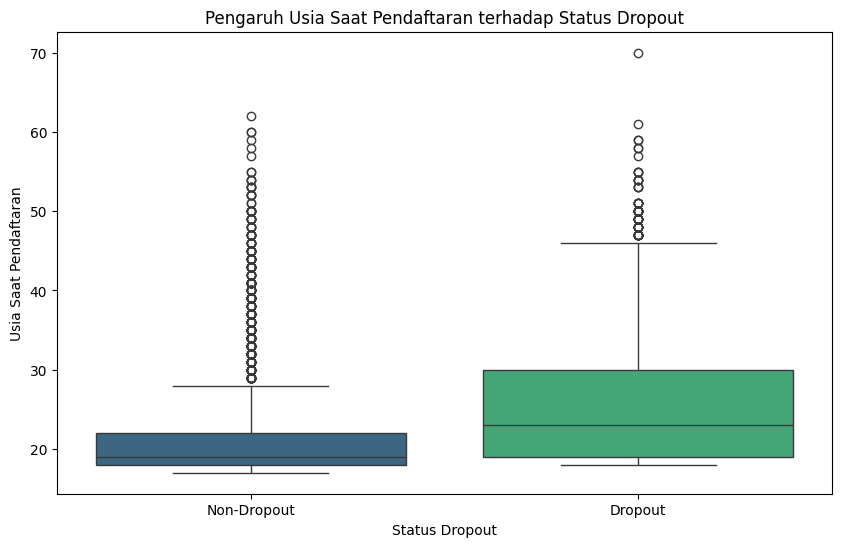

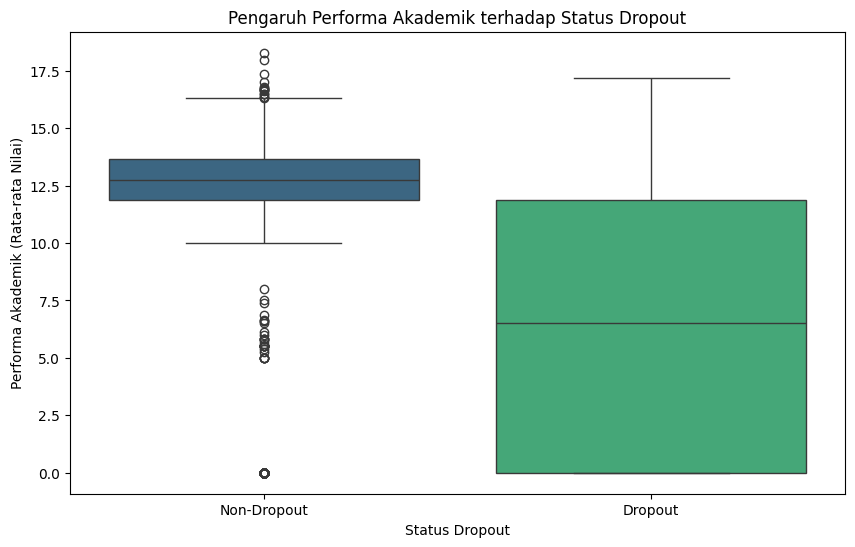

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary encoding for student status
# Transform status to dropout indicator (1:Dropout, 0:Other)
status_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 0}
data['is_dropout'] = data['Status'].map(status_mapping)

# Ensure 'academic_performance' is created before being used in plots
# Feature Engineering - Academic Performance
data['academic_performance'] = data[['Curricular_units_1st_sem_grade',
                                    'Curricular_units_2nd_sem_grade']].mean(axis=1)

plt.figure(figsize=(10, 6))
# Menggunakan hue dan legend=False untuk mengikuti rekomendasi Future Warning
sns.boxplot(x='is_dropout', y='Age_at_enrollment', data=data, palette='viridis', hue='is_dropout', legend=False)
plt.title('Pengaruh Usia Saat Pendaftaran terhadap Status Dropout')
plt.xlabel('Status Dropout')
plt.ylabel('Usia Saat Pendaftaran')
# Pastikan label xticks sesuai dengan nilai 0 dan 1 pada is_dropout
plt.xticks([0, 1], ['Non-Dropout', 'Dropout'])
plt.show()

plt.figure(figsize=(10, 6))
# Menggunakan hue dan legend=False untuk mengikuti rekomendasi Future Warning
sns.boxplot(x='is_dropout', y='academic_performance', data=data, palette='viridis', hue='is_dropout', legend=False)
plt.title('Pengaruh Performa Akademik terhadap Status Dropout')
plt.xlabel('Status Dropout')
plt.ylabel('Performa Akademik (Rata-rata Nilai)')
# Pastikan label xticks sesuai dengan nilai 0 dan 1 pada is_dropout
plt.xticks([0, 1], ['Non-Dropout', 'Dropout'])
plt.show()

1. Grafik Pertama: Memvisualisasikan distribusi Usia Saat Pendaftaran (Age_at_enrollment) berdasarkan Status Dropout (is_dropout). Ini untuk melihat apakah usia saat mendaftar berbeda antara siswa yang dropout dan yang tidak.
2. Grafik Kedua: Memvisualisasikan distribusi Performa Akademik (academic_performance) berdasarkan Status Dropout (is_dropout). Ini untuk melihat apakah rata-rata nilai berbeda antara siswa yang dropout dan yang tidak.

## Data Preparation / Preprocessing

In [42]:
# Binary encoding for student status
# Transform status to dropout indicator (1:Dropout, 0:Other)
status_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 0}
data['is_dropout'] = data['Status'].map(status_mapping)

Secara singkat, kode ini mengubah kolom status mahasiswa yang berupa teks ('Dropout', 'Graduate', 'Enrolled') menjadi angka biner (1 atau 0), di mana 1 menandakan mahasiswa dropout dan 0 menandakan bukan dropout. Kolom baru ini ('is_dropout') akan digunakan sebagai target (hasil yang ingin diprediksi) untuk model machine learning.

In [43]:
data = data.drop(['Status'], axis=1)

Kolom ini dihapus karena pada langkah sebelumnya, Anda sudah membuat kolom baru (is_dropout) yang berisi informasi status siswa dalam bentuk angka (1 untuk Dropout, 0 untuk lainnya), sehingga kolom 'Status' yang lama yang berisi teks tidak lagi diperlukan untuk pemodelan.

In [44]:
# Feature Engineering - Academic Performance
data['academic_performance'] = data[['Curricular_units_1st_sem_grade',
                                    'Curricular_units_2nd_sem_grade']].mean(axis=1)

# Feature Engineering - Course Success Rate
data['success_ratio'] = (data['Curricular_units_1st_sem_approved'] +
                        data['Curricular_units_2nd_sem_approved']) / \
                       (data['Curricular_units_1st_sem_enrolled'] +
                        data['Curricular_units_2nd_sem_enrolled'] + 1e-5)

# Selecting relevant existing features
financial_features = ['Debtor', 'Scholarship_holder', 'Tuition_fees_up_to_date']
demographic_features = ['Age_at_enrollment']

# Alternative approach using assign()
data = data.assign(
    student_age = data['Age_at_enrollment'],
    has_debt = data['Debtor'],
    has_scholarship = data['Scholarship_holder'],
    fees_updated = data['Tuition_fees_up_to_date']
)

Pada bagian kode ini, dilakukan serangkaian langkah untuk mempersiapkan data. Pertama, dibuatlah fitur-fitur baru dari data yang sudah ada; misalnya, performa akademik mahasiswa dihitung dari rata-rata nilai mereka, dan rasio keberhasilan menyelesaikan mata kuliah ditentukan dari jumlah unit yang disetujui dibandingkan dengan yang diambil. Selanjutnya, nama-nama kolom yang mewakili fitur-fitur keuangan dan demografi dikelompokkan ke dalam daftar terpisah untuk memudahkan referensi. Terakhir, beberapa kolom yang ada disalin dan diberi nama baru yang lebih mudah dipahami, seperti usia mahasiswa, status hutang, kepemilikan beasiswa, dan status pembayaran uang kuliah, dengan menggunakan cara yang lebih efisien.

In [45]:
# Missing Value Analysis
def analyze_missing_data(df):
    """Menganalisis dan menampilkan informasi nilai yang hilang dalam dataset"""

    # Hitung total nilai missing per kolom
    missing_stats = df.isna().sum()

    # Filter hanya kolom dengan missing values
    missing_stats = missing_stats[missing_stats > 0]

    if len(missing_stats) == 0:
        print("✅ Dataset tidak mengandung missing values")
    else:
        print("⚠️ Missing values ditemukan:")
        # Tampilkan dalam format dataframe yang lebih rapi
        missing_df = pd.DataFrame({
            'Kolom': missing_stats.index,
            'Jumlah Missing': missing_stats.values,
            'Persentase': (missing_stats.values/len(df))*100
        })
        print(missing_df.to_string(index=False))

    return missing_stats

# Eksekusi fungsi
missing_data = analyze_missing_data(data)

✅ Dataset tidak mengandung missing values


Kode Python ini berisi definisi sebuah fungsi bernama analyze_missing_data yang dirancang khusus untuk menganalisis nilai-nilai yang hilang (missing values) dalam sebuah dataset yang disimpan dalam format Pandas DataFrame. Fungsi ini akan memeriksa setiap kolom dalam DataFrame yang diberikan, menghitung total nilai yang kosong atau tidak terisi, dan kemudian melaporkan hasilnya. Jika tidak ada nilai yang hilang sama sekali di seluruh dataset, fungsi akan memberikan konfirmasi positif. Namun, jika ditemukan nilai yang hilang, fungsi akan menampilkan daftar lengkap kolom yang terpengaruh, lengkap dengan jumlah serta persentase nilai hilang untuk masing-masing kolom tersebut, memberikan gambaran yang jelas tentang masalah data yang perlu ditangani. Pada akhirnya, kode ini menjalankan fungsi analyze_missing_data pada DataFrame bernama data untuk memulai proses analisis missing value tersebut.

In [46]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_features(df):
    """
    Mengkonversi semua kolom kategorikal menjadi numerik menggunakan Label Encoding
    dan menyimpan encoder untuk referensi invers transform

    Parameters:
    df (DataFrame): Dataframe pandas yang akan diproses

    Returns:
    tuple: (DataFrame yang sudah diencode, dict encoder)
    """

    # Identifikasi kolom kategorikal
    cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Inisialisasi penyimpanan encoder
    encoder_dict = {}

    # Proses encoding untuk setiap fitur kategorikal
    for feature in cat_features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature].astype(str))
        encoder_dict[feature] = encoder

    return df, encoder_dict

# Eksekusi fungsi encoding
encoded_data, feature_encoders = encode_categorical_features(data.copy())

Kode ini berfungsi untuk mengonversi kolom-kolom dalam dataset yang berisi data kategorikal (seperti teks) menjadi format numerik yang dapat dipahami oleh sebagian besar model machine learning. Proses ini dilakukan dengan mendefinisikan sebuah fungsi bernama encode_categorical_features. Fungsi ini pertama-tama mengidentifikasi kolom mana saja dalam dataset yang memiliki tipe data objek atau kategori, lalu secara berurutan menggunakan objek LabelEncoder dari pustaka scikit-learn untuk mengubah setiap nilai unik dalam kolom-kolom tersebut menjadi angka bulat. Selama proses konversi, fungsi ini juga menyimpan encoder yang digunakan untuk setiap kolom dalam sebuah dictionary, yang berguna jika suatu saat Anda perlu mengembalikan angka-angka tersebut ke bentuk kategorinya semula. Setelah fungsi selesai dijalankan pada dataset yang ada (dengan membuat salinannya agar data asli tetap utuh), hasilnya berupa dataset baru dengan kolom kategorikal yang sudah menjadi numerik dan dictionary yang berisi encoder yang digunakan, keduanya siap untuk digunakan pada tahapan analisis atau pemodelan selanjutnya.

In [47]:
# Split features dan target
X = data.drop(columns=['is_dropout'])
y = data['is_dropout']

Kode ini merupakan langkah persiapan data krusial dalam proses machine learning, yaitu membagi dataset Anda menjadi dua komponen utama: fitur dan target. Pertama, sebuah variabel bernama X dibuat. Variabel X ini akan menampung semua kolom dari dataset asli Anda (data), kecuali kolom yang bernama 'is_dropout'. Dengan kata lain, X berisi semua informasi atau karakteristik (seperti usia, nilai, status keuangan, dll.) yang akan digunakan sebagai masukan untuk model prediktif. Kedua, sebuah variabel lain bernama y dibuat. Variabel y ini hanya mengambil kolom 'is_dropout' dari dataset asli. Kolom 'is_dropout' inilah yang menjadi "target" atau hasil yang ingin Anda prediksi (apakah seorang siswa dropout atau tidak, yang direpresentasikan dengan angka 1 atau 0). Proses pemisahan ini sangat penting karena model machine learning dilatih untuk mempelajari hubungan antara fitur-fitur di X dengan target di y, sehingga model nantinya dapat menggunakan fitur dari data baru untuk memprediksi targetnya.

In [48]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Kode singkat ini menjalankan langkah penting dalam persiapan data untuk machine learning, yaitu standarisasi fitur. Pertama, kode membuat objek StandardScaler yang berasal dari pustaka scikit-learn. Tugas utama StandardScaler adalah mengubah setiap kolom (fitur) dalam data Anda sehingga memiliki rata-rata nol dan simpangan baku satu. Proses ini dilakukan dengan menghitung rata-rata dan simpangan baku dari data fitur (X) menggunakan metode fit(), dan kemudian menerapkan transformasi tersebut ke data fitur yang sama menggunakan metode transform(). Hasil dari proses standarisasi ini disimpan dalam variabel X_scaled. Mengapa standarisasi penting? Karena banyak algoritma machine learning bekerja lebih baik jika fitur-fitur input memiliki skala yang serupa; jika skala fitur sangat bervariasi, fitur dengan nilai besar bisa mendominasi proses pembelajaran model meskipun sebenarnya tidak lebih penting. Dengan menstandardisasi data, kita memastikan bahwa semua fitur berkontribusi secara adil pada proses pelatihan model.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Kode ini adalah langkah penting dalam persiapan data untuk melatih model machine learning. Kode ini menggunakan fungsi train_test_split yang berasal dari pustaka scikit-learn di Python. Fungsi ini bertugas membagi dataset Anda menjadi dua bagian: satu bagian untuk melatih model (X_train dan y_train) dan bagian lainnya untuk menguji seberapa baik kinerja model setelah dilatih (X_test dan y_test). Pembagian ini dilakukan dengan menentukan test_size=0.2, yang berarti 20% dari total data akan dialokasikan sebagai data uji dan 80% sisanya akan menjadi data latih. Argumen random_state=42 digunakan untuk memastikan bahwa setiap kali Anda menjalankan kode ini, pembagian data akan selalu sama dan konsisten, sehingga hasil yang didapat dapat direproduksi. Dengan memisahkan data menjadi set pelatihan dan pengujian, kita dapat melatih model pada satu set data dan kemudian mengevaluasi kemampuannya pada data yang belum pernah dilihat sebelumnya, yang sangat penting untuk menghindari overfitting (ketika model hanya bekerja baik pada data latih tetapi buruk pada data baru).

## Modeling

Bagian ini fokus pada pembuatan dan pengoptimalan model untuk memprediksi dropout siswa menggunakan algoritma XGBoost.

* GridSearchCV: Digunakan untuk mencari kombinasi hyperparameter XGBoost terbaik secara otomatis guna meningkatkan kinerja model.
* XGBoost (xgb): Algoritma gradient boosting yang efisien dipilih sebagai model utama.
* get_optimized_hyperparameter_grid(): Fungsi ini mendefinisikan rentang nilai hyperparameter (seperti max_depth, learning_rate) yang akan diuji oleh GridSearchCV.
* quick_grid_search(): Fungsi ini menjalankan proses pencarian grid pada data latih (X_train, y_train) dengan cross-validation (cv=3) untuk menemukan model dengan akurasi terbaik.
* Kode di bagian if __name__ == "__main__": mengeksekusi pencarian grid, mencetak hyperparameter terbaik (best_params_) dan akurasi validasi terbaik (best_score_).
* Model terbaik yang ditemukan (best_model) kemudian dievaluasi pada data uji (X_test, y_test) untuk mendapatkan estimasi kinerja pada data yang belum pernah dilihat (test_acc).

In [50]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings

def get_optimized_hyperparameter_grid():
    """Mengembalikan grid parameter yang optimal untuk tuning cepat"""
    return {
        'max_depth': [3, 5],           # Kedalaman pohon lebih kecil untuk efisiensi
        'learning_rate': [0.05, 0.1],  # Learning rate lebih besar untuk konvergensi cepat
        'n_estimators': [100],         # Jumlah pohon yang cukup tanpa berlebihan
        'subsample': [0.8, 1.0],       # Rasio subsampling yang umum digunakan
        'colsample_bytree': [0.8, 1.0] # Rasio fitur yang umum digunakan
    }

def quick_grid_search(X, y, cv=3):
    """Melakukan grid search yang cepat dan efisien"""
    # Model dasar dengan konfigurasi optimal
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1  # Menggunakan semua core CPU
    )

    # Dapatkan parameter grid yang dioptimalkan
    param_grid = get_optimized_hyperparameter_grid()

    # Setup GridSearchCV
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=cv,
            scoring='accuracy',
            n_jobs=1,  # Mengurangi overhead paralelisasi
            verbose=1
        )
        grid_search.fit(X, y)

    return grid_search

# Contoh penggunaan
if __name__ == "__main__":
    # Lakukan grid search cepat
    print("Memulai proses Grid Search yang dioptimalkan...")
    grid_result = quick_grid_search(X_train, y_train, cv=3)

    # Hasil terbaik
    print("\nParameter terbaik:")
    print(grid_result.best_params_)
    print(f"\nAkurasi validasi terbaik: {grid_result.best_score_:.4f}")

    # Evaluasi model terbaik
    best_model = grid_result.best_estimator_
    test_acc = best_model.score(X_test, y_test)
    print(f"\nAkurasi test set: {test_acc:.4f}")

Memulai proses Grid Search yang dioptimalkan...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Parameter terbaik:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Akurasi validasi terbaik: 0.8853

Akurasi test set: 0.8565


Kode ini menyimpan model machine learning yang sudah dilatih dan tool pra-pemrosesan data (scaler dan encoder) ke dalam file menggunakan joblib. Ini memungkinkan Anda memuat dan menggunakan kembali model serta transformasi data tanpa perlu mengulang proses pelatihan atau preprocessing.

## Evaluation

In [51]:
# Predict
y_pred = best_model.predict(X_test)

# Evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model setelah tuning: {accuracy}")



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       569
           1       0.84      0.74      0.79       316

    accuracy                           0.86       885
   macro avg       0.85      0.83      0.84       885
weighted avg       0.86      0.86      0.85       885


Confusion Matrix:
[[525  44]
 [ 83 233]]

Akurasi Model setelah tuning: 0.8564971751412429


### Analisis Kinerja Model Klasifikasi

#### 1. Laporan Klasifikasi (Classification Report)
| Metric       | Kelas 0 (Tidak Dropout) | Kelas 1 (Dropout) |
|--------------|-------------------------|-------------------|
| Precision    | 0.86                    | 0.84              |
| Recall       | 0.92                    | 0.74              |
| F1-Score     | 0.89                    | 0.79              |

**Akurasi Global**: 85.65% (0.8565)

#### 2. Matriks Kebingungan (Confusion Matrix)
|                       | Prediksi Tidak Dropout | Prediksi Dropout |
|-----------------------|------------------------|------------------|
| **Aktual Tidak Dropout** | 525 (TN)               | 44 (FP)          |
| **Aktual Dropout**       | 83 (FN)                | 233 (TP)         |

#### 3. Interpretasi Kinerja
- **Kelebihan Model**:
  - Akurasi keseluruhan tinggi (85.65%)
  - Performa kuat pada Kelas 0 (Recall 92%, F1-Score 0.89)
  - Presisi konsisten di kedua kelas (0.84+)

- **Area Perbaikan**:
  - **Recall Kelas 1** (74%) menunjukkan 26% kasus dropout tidak terdeteksi
  - **False Negatives** relatif tinggi (83 kasus) berpotensi menyebabkan intervensi yang terlewat
  - Ketimpangan performa antar kelas (gap Recall 18%)

**Rekomendasi**:
1. Eksperimen dengan teknik _class weighting_ atau _resampling_
2. Evaluasi threshold klasifikasi untuk optimasi recall Kelas 1
3. Penambahan fitur yang lebih diskriminatif untuk kasus dropout